## MIMIC

In [2]:
import numpy as np
import time
from scipy.stats import entropy
from pyitlib import discrete_random_variable as drv
import matplotlib.pyplot as plt

In [3]:
def init_prob_vec(d):
    p = np.zeros(d)
    for k in range(d):
        p[k] = 0.5
    return p

In [4]:
def binary_random(p):
    if np.random.rand() < p:
        z = 1
    else:
        z = 0
    return z

In [5]:
def random_individual(p, d):
    x = np.zeros(d, dtype=int)
    for k in range(d):
        x[k] = binary_random(p[k])
    return x

In [6]:
def random_population(p, N, d):
    population = np.zeros((N, d), dtype=int)
    for k in range (N):
        population[k] = random_individual(p, d)
    return population

In [7]:
def population_evaluation(population, F, N):
    evaluation = np.zeros(N)
    for k in range(N):
        evaluation[k] = F(population[k])
    return evaluation

In [8]:
def best_individual(population, evaluation):
    min_idx = np.argmin(evaluation)
    return (population[min_idx], evaluation[min_idx])

In [9]:
def select(population, evaluation, theta):
    indices = np.where(evaluation > theta)[0]
    return np.delete(population, indices, axis=0)

In [10]:
def probability_conditional(col1, col2, x_shape):
    pb = np.count_nonzero(col2) / x_shape
    if pb == 0:
        pb += 1e-50
    p = 0
    for x in range(x_shape):
        if col1[x] == 1 and col2[x] == 1:
            p += 1
    p /= x_shape
    return p / pb

d - chromosome length </br>
N - population size </br>
T - number of iterations </br>
F - objective function

In [15]:
def mimic(d, N, T, F):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation(population, F, N)
    theta = np.median(evaluation)
    
    for t in range(T):
        sample = select(population, evaluation, theta)

        i = np.zeros(d, dtype=int)
        i[d-1] = np.argmin(entropy(sample, base=2, axis=0))
        js = np.arange(0, d)
        for k in reversed(range(d-1)):
            cond_entropies = []
            js = js[js != i[k+1]]
            for j in js:
                cond_entropies.append((j, drv.entropy_conditional(sample[:, j], sample[:, i[k+1]], base=2)))
            i[k] = min(np.array(cond_entropies), key=lambda x: x[1])[0]
#         print(f'Permutation in iteration nr {t}: \n {i}')
        
        p[d-1] = np.count_nonzero(sample[:, i[d-1]]) / sample.shape[0]
        for k in reversed(range(d-1)):
            p[k] = probability_conditional(sample[:, i[k]], sample[:, i[k+1]], sample.shape[0])

        population = random_population(p, N, d)
        evaluation = population_evaluation(population, F, N)
        best = best_individual(population, evaluation)
        results.append(best[1])
#         print(f'Best individual in iteration nr {t}: \n {best[0]}, {best[1]}')
        theta = np.percentile(evaluation, 2)
    
    print(time.time() - t0, best[0], best[1])
    return results

## Results

In [12]:
def show_plt(results):
    plt.figure()
    plt.plot(results)
    plt.xlabel("iteration number")
    plt.ylabel("objective function value")
    plt.show()

### OneMax

In [13]:
def one_max(x):
    return -np.sum(x)

Permutation in iteration nr 0: 
 [64 14 91 68 87  2 21 71 30 66 11 44 22 41 29 92 88  6 59 28 57 90 95 19
 89 24 43  1 31 46 36 69 32  3 37 16 83 15 34 74 35 53 93 50 81 73  5 98
 18 26 84 79 96 78 80 85 42 49 72 51 47 39 52 12 56  0 45 54 17 60 27 76
 94 55 70 13 67 82 20 58  9 62 40  7 65 63 97 75 48  4 10 86 77 99 33 61
 25 23 38  8]
Permutation in iteration nr 1: 
 [51 35 52 25 72 80 10 36 84 49 79  4 58 26 18 28  9 83 47 59 27 91 37 12
 30 42  2 44 39 38 48  1 86 22  0 78 62 31 65 81 76 88 97 40 13 92 67 53
 33 85 32 98 57 82 77 55 90 54 19 17 43 46 16 34 73  6 21 23  8 45 69 63
 56 99 50 87 95 94 60 20 70 75 11 74 61 41 64 15 29 66  5  3  7 68 96 89
 93 24 71 14]
Permutation in iteration nr 2: 
 [42 51 99 22 52  9 21  6 29 10  8 18 61 63 17 16 60 62  7 27 33  1  4 19
 28 11 75 66 84  0 69 40  5 26 56 85 37 54 38 48 50 68 39 88 86 90 36 70
 78 25 15 73 65 35 71 44 46 89 20 74 47 57 80 41 45 72 87 13 12 76 79 93
 92 91 34 43 24 23 14  2 49 58 55 53 67 31 82 95 81 77 64 30 94 96 59 

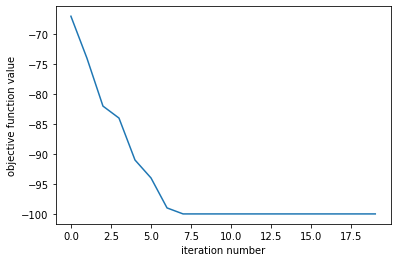

In [16]:
results = mimic(100, 1000, 20, one_max)
show_plt(results)

### DeceptiveOneMax

In [318]:
def deceptive_one_max(x):
    if np.count_nonzero(x) == 0:
        return -(len(x) + 1)
    else:
        return -np.sum(x)

132.11605858802795 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] -100.0


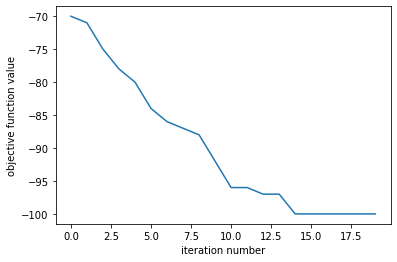

In [319]:
results = mimic(100, 1000, 20, deceptive_one_max)
show_plt(results)

### K-DeceptiveOneMax

In [328]:
def k_deceptive_one_max(x, k):
    i = 0
    j = k
    res = 0
    for _ in range(0, len(x), k):
        res += deceptive_one_max(x[i:j])
        i += k
        j += k
    return res 

In [303]:
def population_evaluation_k(population, F, N, k):
    evaluation = np.zeros(N)
    for i in range(N):
        evaluation[i] = F(population[i], k)
    return evaluation

In [326]:
def mimic_k(d, N, T, F, k):
    t0 = time.time()
    
    results = []
    p = init_prob_vec(d)
    population = random_population(p, N, d)
    evaluation = population_evaluation_k(population, F, N, k)
    theta = np.median(evaluation)
    
    for t in range(T):
        sample = select(population, evaluation, theta)

        i = np.zeros(d, dtype=int)
        i[d-1] = np.argmin(entropy(sample, base=2, axis=0))
        js = np.arange(0, d)
        for x in reversed(range(d-1)):
            cond_entropies = []
            js = js[js != i[x+1]]
            for j in js:
                cond_entropies.append((j, drv.entropy_conditional(sample[:, j], sample[:, i[x+1]], base=2)))
            i[x] = min(np.array(cond_entropies), key=lambda x: x[1])[0]
        
        p[d-1] = np.count_nonzero(sample[:, i[d-1]]) / sample.shape[0]
        for x in reversed(range(d-1)):
            p[x] = probability_conditional(sample[:, i[x]], sample[:, i[x+1]], sample.shape[0])

        population = random_population(p, N, d)
        evaluation = population_evaluation_k(population, F, N, k)
        best = best_individual(population, evaluation)
        results.append(best[1])
#         print(f'Best individual in iteration nr {t}: \n {best[0]}, {best[1]}')
        theta = np.percentile(evaluation, 10)
    
    print(time.time() - t0, best[0], best[1])
    return results

131.501859664917 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] -100.0


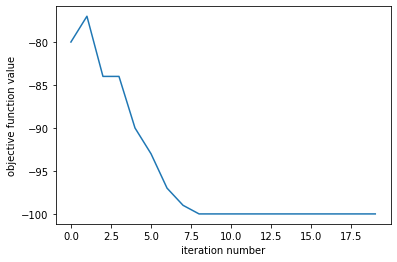

In [329]:
results = mimic_k(100, 1000, 20, k_deceptive_one_max, 5)
show_plt(results)